# Bag of Words with n-gram

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# load preprocessed text
review_data = pd.read_pickle("review_data.pkl")

In [4]:
# Stratified Test Train Spilt

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(review_data.Text,review_data.Sentiment,
                                                 test_size=0.3,stratify=review_data.Sentiment,
                                                 random_state=42)
X_train.shape

(254914,)

In [5]:
#Creating BOW Features with Bi-gram for our dataset

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(ngram_range=(1,2)) # it gives uni-gram + bi-gram
final_counts = count_vector.fit_transform(X_train.values)
print(final_counts.shape)
# here final_counts is sparse representation of document

(254914, 2330815)


In [6]:
# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB()
clf.fit(final_counts,y_train)
print(clf.score(final_counts,y_train))
X_test_bow = count_vector.transform(X_test)
print(clf.score(X_test_bow,y_test))

0.9607946209309807
0.9113592677345538


**Conclusion** :  This gives better performance than all previous approches. Lets go ahead and try with tri-gram Approch

In [8]:
print("dimention of single document is :",len(count_vector.get_feature_names()))

dimention of single document is : 2330815


Bi-gram have very very high dimension as compare to all previous approches.

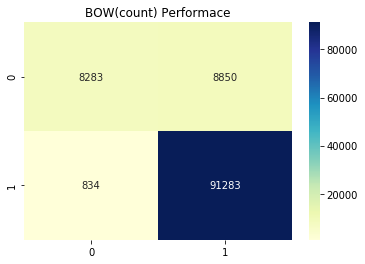

In [9]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test,clf.predict(X_test_bow))
sns.heatmap(cnf,annot=True,fmt='g',cmap="YlGnBu");
plt.title("BOW(count) Performace");

# Bag of Words with Tri-gram

In [10]:
#Creating BOW Features with Tri-gram for our dataset

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(ngram_range=(1,3)) # it gives uni-gram + Bi-gram +Tri-gram
final_counts = count_vector.fit_transform(X_train.values)
print(final_counts.shape)
# here final_counts is sparse representation of document

(254914, 10595852)


In [11]:
# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB()
clf.fit(final_counts,y_train)
print(clf.score(final_counts,y_train))
X_test_bow = count_vector.transform(X_test)
print(clf.score(X_test_bow,y_test))

0.978945840557992
0.8735469107551488


**Conclusion** :  Performance drops drastically when we move from bi-gram to tri-gram approch. Incresing n-gram not always help

In [12]:
print("dimention of single document is :",len(count_vector.get_feature_names()))

dimention of single document is : 10595852


Tri-gram have highest dimension as compare to all previous approches.

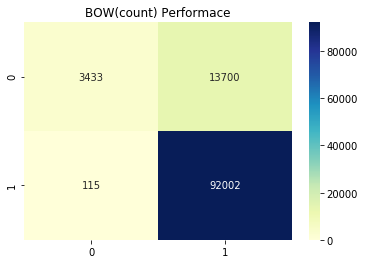

In [13]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test,clf.predict(X_test_bow))
sns.heatmap(cnf,annot=True,fmt='g',cmap="YlGnBu");
plt.title("BOW(count) Performace");